In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("D:\\dataset\\lumbarspine\\train.csv")
train_descrip = pd.read_csv("D:\\dataset\\lumbarspine\\train_series_descriptions.csv")
train_coord = pd.read_csv("D:\\dataset\\lumbarspine\\train_label_coordinates.csv")

In [4]:
train

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,4282019580,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate
1971,4283570761,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1972,4284048608,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild
1973,4287160193,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Severe,Moderate,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Moderate,Normal/Mild


In [5]:
train_descrip

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1
...,...,...,...
6289,4287160193,1507070277,Sagittal T2/STIR
6290,4287160193,1820446240,Axial T2
6291,4290709089,3274612423,Sagittal T2/STIR
6292,4290709089,3390218084,Axial T2


In [6]:
train_coord

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602
...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333


In [7]:
condition_level_mapping = {
    'Left Subarticular Stenosis': {
        'L1/L2': 'left_subarticular_stenosis_l1_l2',
        'L2/L3': 'left_subarticular_stenosis_l2_l3',
        'L3/L4': 'left_subarticular_stenosis_l3_l4',
        'L4/L5': 'left_subarticular_stenosis_l4_l5',
        'L5/S1': 'left_subarticular_stenosis_l5_s1',
    }
    ,
    'Spinal Canal Stenosis': {
        'L1/L2': 'spinal_canal_stenosis_l1_l2',
        'L2/L3': 'spinal_canal_stenosis_l2_l3',
        'L3/L4': 'spinal_canal_stenosis_l3_l4',
        'L4/L5': 'spinal_canal_stenosis_l4_l5',
        'L5/S1': 'spinal_canal_stenosis_l5_s1',
    },
    'Right Subarticular Stenosis': {
        'L1/L2': 'right_subarticular_stenosis_l1_l2',
        'L2/L3': 'right_subarticular_stenosis_l2_l3',
        'L3/L4': 'right_subarticular_stenosis_l3_l4',
        'L4/L5': 'right_subarticular_stenosis_l4_l5',
        'L5/S1': 'right_subarticular_stenosis_l5_s1',
    },
    'Left Neural Foraminal Narrowing': {
        'L1/L2': 'left_neural_foraminal_narrowing_l1_l2',
        'L2/L3': 'left_neural_foraminal_narrowing_l2_l3',
        'L3/L4': 'left_neural_foraminal_narrowing_l3_l4',
        'L4/L5': 'left_neural_foraminal_narrowing_l4_l5',
        'L5/S1': 'left_neural_foraminal_narrowing_l5_s1',
    },
    'Right Neural Foraminal Narrowing': {
        'L1/L2': 'left_neural_foraminal_narrowing_l1_l2',
        'L2/L3': 'left_neural_foraminal_narrowing_l2_l3',
        'L3/L4': 'left_neural_foraminal_narrowing_l3_l4',
        'L4/L5': 'left_neural_foraminal_narrowing_l4_l5',
        'L5/S1': 'left_neural_foraminal_narrowing_l5_s1',
    }
}

In [8]:
def getSeverity(row) :
    condition = row["condition"]
    level = row["level"]
    col = condition_level_mapping[condition][level]
    sev = train.loc[train["study_id"] == row["study_id"],col].values[0]
    return sev
    

In [9]:
df=train_coord
df["severity"] = df.apply(getSeverity,axis=1)

In [10]:
df.shape

(48692, 8)

In [11]:
df

,study_id,series_id,instance_number,condition,level,x,y,severity
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild
...,...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063,Normal/Mild
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084,Normal/Mild
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624,Normal/Mild
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333,Normal/Mild


In [12]:
merged_df = pd.merge(df, train_descrip, on=['study_id', 'series_id'], how='inner')
merged_df

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Normal/Mild,Sagittal T2/STIR
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Normal/Mild,Sagittal T2/STIR
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Normal/Mild,Sagittal T2/STIR
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Normal/Mild,Sagittal T2/STIR
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Normal/Mild,Sagittal T2/STIR
...,...,...,...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing,L1/L2,219.465940,97.831063,Normal/Mild,Sagittal T1
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L2/L3,205.340599,140.207084,Normal/Mild,Sagittal T1
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L3/L4,202.724796,181.013624,Normal/Mild,Sagittal T1
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing,L4/L5,202.933333,219.733333,Normal/Mild,Sagittal T1


In [13]:
merged_df.to_csv("master_data.csv")

In [14]:
merged_df.shape

(48692, 9)

In [15]:
filtered_df = df[df["condition"] == "Left Subarticular Stenosis"]

In [16]:
filtered_df.shape

(9608, 8)

In [17]:
merged_df1 = pd.merge(filtered_df, train_descrip, on=['study_id', 'series_id'], how='inner')
merged_df1

,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,4003253,2448190387,3,Left Subarticular Stenosis,L1/L2,179.126448,161.235521,Normal/Mild,Axial T2
1,4003253,2448190387,11,Left Subarticular Stenosis,L2/L3,180.979730,158.764479,Normal/Mild,Axial T2
2,4003253,2448190387,19,Left Subarticular Stenosis,L3/L4,176.037645,157.528958,Normal/Mild,Axial T2
3,4003253,2448190387,28,Left Subarticular Stenosis,L4/L5,172.948842,156.911197,Moderate,Axial T2
4,4003253,2448190387,35,Left Subarticular Stenosis,L5/S1,179.744208,161.853282,Normal/Mild,Axial T2
...,...,...,...,...,...,...,...,...,...
9603,4290709089,3390218084,3,Left Subarticular Stenosis,L1/L2,352.531699,358.140321,Normal/Mild,Axial T2
9604,4290709089,3390218084,5,Left Subarticular Stenosis,L2/L3,349.285714,366.796281,Normal/Mild,Axial T2
9605,4290709089,3390218084,10,Left Subarticular Stenosis,L3/L4,350.367709,360.845309,Normal/Mild,Axial T2
9606,4290709089,3390218084,15,Left Subarticular Stenosis,L4/L5,348.203719,341.369400,Normal/Mild,Axial T2


In [18]:
merged_df1.shape

(9608, 9)

In [19]:
merged_df1.to_csv("filtered_master_data.csv")

In [20]:
df= pd.read_csv('filtered_master_data.csv')
df.head()

,Unnamed: 0,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,0,4003253,2448190387,3,Left Subarticular Stenosis,L1/L2,179.126448,161.235521,Normal/Mild,Axial T2
1,1,4003253,2448190387,11,Left Subarticular Stenosis,L2/L3,180.979730,158.764479,Normal/Mild,Axial T2
2,2,4003253,2448190387,19,Left Subarticular Stenosis,L3/L4,176.037645,157.528958,Normal/Mild,Axial T2
3,3,4003253,2448190387,28,Left Subarticular Stenosis,L4/L5,172.948842,156.911197,Moderate,Axial T2
4,4,4003253,2448190387,35,Left Subarticular Stenosis,L5/S1,179.744208,161.853282,Normal/Mild,Axial T2


In [21]:
df.shape

(9608, 10)

In [22]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0            0
study_id              0
series_id             0
instance_number       0
condition             0
level                 0
x                     0
y                     0
severity              5
series_description    0
dtype: int64

In [23]:
df.dropna(subset=['study_id','series_id','instance_number','condition','level','x','y','severity','series_description'],inplace=True)

In [24]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9603 entries, 0 to 9607
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9603 non-null   int64  
 1   study_id            9603 non-null   int64  
 2   series_id           9603 non-null   int64  
 3   instance_number     9603 non-null   int64  
 4   condition           9603 non-null   object 
 5   level               9603 non-null   object 
 6   x                   9603 non-null   float64
 7   y                   9603 non-null   float64
 8   severity            9603 non-null   object 
 9   series_description  9603 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 825.3+ KB


In [41]:
df_all_master=pd.read_csv("master_data.csv")
df_all_master.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,48692.0,2.434550e+04,1.405631e+04,0.000000e+00,1.217275e+04,2.434550e+04,3.651825e+04,4.869100e+04
study_id,48692.0,2.160244e+09,1.237310e+09,4.003253e+06,1.093392e+09,2.196441e+09,3.225352e+09,4.290709e+09
series_id,48692.0,2.154461e+09,1.244319e+09,1.099600e+04,1.069855e+09,2.163803e+09,3.242314e+09,4.294540e+09
instance_number,48692.0,1.340968e+01,5.658503e+01,1.000000e+00,7.000000e+00,1.100000e+01,1.500000e+01,5.046000e+03
x,48692.0,2.382375e+02,7.322643e+01,4.058824e+00,1.790681e+02,2.348362e+02,2.827327e+02,6.861903e+02
y,48692.0,2.330702e+02,9.248033e+01,2.063098e+00,1.647405e+02,2.191252e+02,2.897596e+02,8.018597e+02


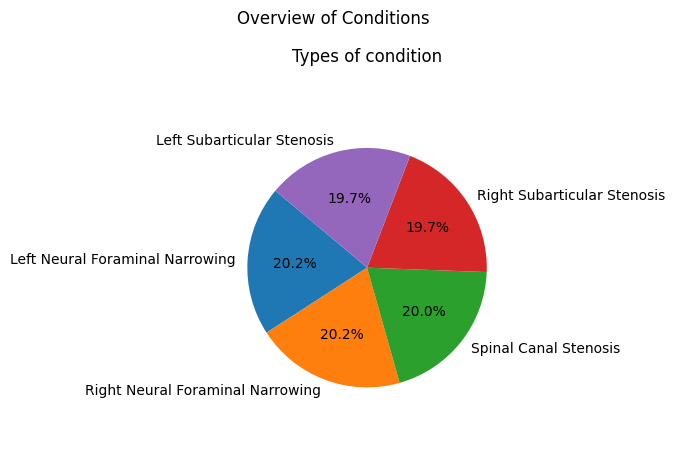

In [42]:
condition_count= df_all_master['condition'].value_counts()
condition_count


import matplotlib.pyplot as plt



# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Pie chart on one of the subplots, for example
ax.pie(condition_count, labels=condition_count.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Types of condition')
plt.axis('equal') 
plt.suptitle('Overview of Conditions')  # Sets title for the entire figure
plt.tight_layout()

plt.show()

In [43]:
condition_count= df['condition'].value_counts()
condition_count

condition
Left Subarticular Stenosis    9603
Name: count, dtype: int64

In [44]:
level_count= df['level'].value_counts()
level_count

level
L3/L4    1970
L4/L5    1970
L5/S1    1963
L2/L3    1891
L1/L2    1809
Name: count, dtype: int64

In [45]:
severity_count= df['severity'].value_counts()
severity_count

severity
Normal/Mild    6857
Moderate       1834
Severe          912
Name: count, dtype: int64

In [46]:
series_descriptionCount= df['series_description'].value_counts()
series_descriptionCount

series_description
Axial T2    9603
Name: count, dtype: int64

In [47]:
import seaborn as sns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17516\190295794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_count.values, y=level_count.index, palette='Paired')


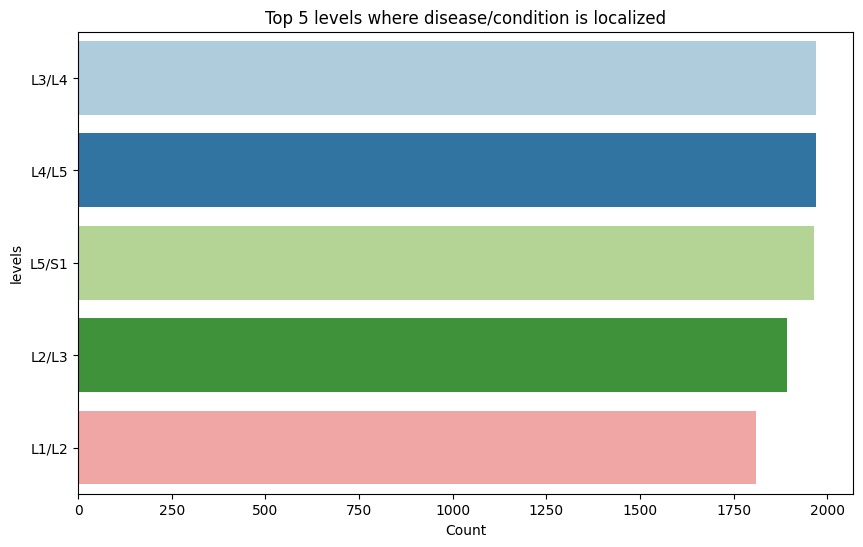

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=level_count.values, y=level_count.index, palette='Paired')
plt.xlabel('Count')
plt.ylabel('levels')
plt.title('Top 5 levels where disease/condition is localized')
plt.show()

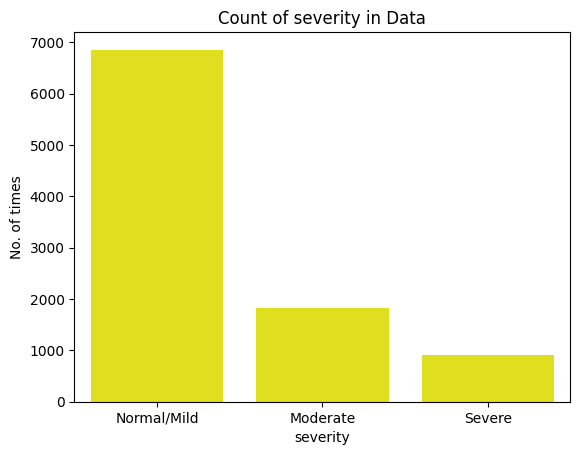

In [49]:
sns.countplot(data=df, x='severity', color = 'yellow')
plt.title('Count of severity in Data')
plt.xlabel('severity')
plt.ylabel('No. of times')
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
dfle = df.copy()


columns_to_encode = ['condition', 'level', 'severity','series_description']


for i in columns_to_encode:
    le = LabelEncoder()
    dfle[i] = le.fit_transform(dfle[i])


print(dfle)

      Unnamed: 0    study_id   series_id  instance_number  condition  level  \
0              0     4003253  2448190387                3          0      0   
1              1     4003253  2448190387               11          0      1   
2              2     4003253  2448190387               19          0      2   
3              3     4003253  2448190387               28          0      3   
4              4     4003253  2448190387               35          0      4   
...          ...         ...         ...              ...        ...    ...   
9603        9603  4290709089  3390218084                3          0      0   
9604        9604  4290709089  3390218084                5          0      1   
9605        9605  4290709089  3390218084               10          0      2   
9606        9606  4290709089  3390218084               15          0      3   
9607        9607  4290709089  3390218084               20          0      4   

               x           y  severity  series_desc

In [52]:
numerical_columns = dfle.select_dtypes(include=['number'])
cor = numerical_columns.corr()
cor

,Unnamed: 0,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
Unnamed: 0,1.000000,0.999895,0.005397,0.005415,NaN,0.000329,-0.005290,-0.013915,0.021480,NaN
study_id,0.999895,1.000000,0.005639,0.005617,NaN,0.000032,-0.004959,-0.013701,0.021573,NaN
series_id,0.005397,0.005639,1.000000,0.005764,NaN,-0.003136,0.009570,0.006943,0.008253,NaN
instance_number,0.005415,0.005617,0.005764,1.000000,NaN,0.074556,-0.020648,-0.020229,-0.020825,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
level,0.000329,0.000032,-0.003136,0.074556,NaN,1.000000,0.002869,-0.048625,-0.049179,NaN
x,-0.005290,-0.004959,0.009570,-0.020648,NaN,0.002869,1.000000,0.945475,0.017213,NaN
y,-0.013915,-0.013701,0.006943,-0.020229,NaN,-0.048625,0.945475,1.000000,0.021358,NaN
severity,0.021480,0.021573,0.008253,-0.020825,NaN,-0.049179,0.017213,0.021358,1.000000,NaN
series_description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df1=df.drop(columns=['condition','series_description'])
df1

,Unnamed: 0,study_id,series_id,instance_number,level,x,y,severity
0,0,4003253,2448190387,3,L1/L2,179.126448,161.235521,Normal/Mild
1,1,4003253,2448190387,11,L2/L3,180.979730,158.764479,Normal/Mild
2,2,4003253,2448190387,19,L3/L4,176.037645,157.528958,Normal/Mild
3,3,4003253,2448190387,28,L4/L5,172.948842,156.911197,Moderate
4,4,4003253,2448190387,35,L5/S1,179.744208,161.853282,Normal/Mild
...,...,...,...,...,...,...,...,...
9603,9603,4290709089,3390218084,3,L1/L2,352.531699,358.140321,Normal/Mild
9604,9604,4290709089,3390218084,5,L2/L3,349.285714,366.796281,Normal/Mild
9605,9605,4290709089,3390218084,10,L3/L4,350.367709,360.845309,Normal/Mild
9606,9606,4290709089,3390218084,15,L4/L5,348.203719,341.369400,Normal/Mild


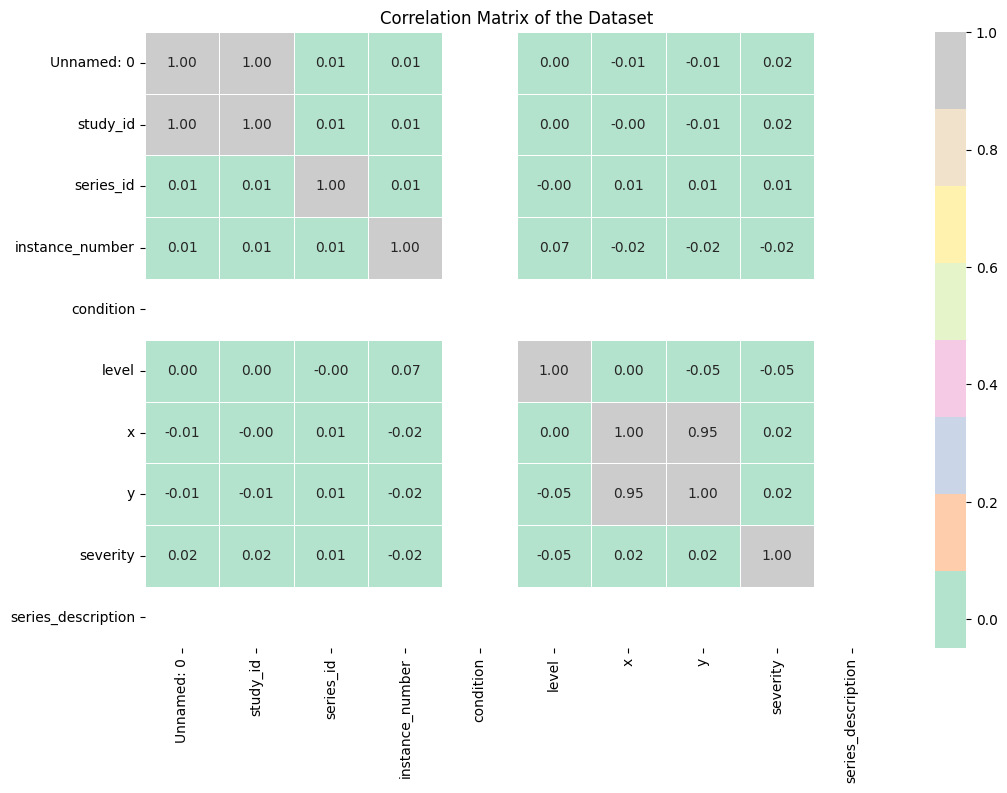

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap='Pastel2', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of the Dataset')
plt.show()

In [55]:
numerical_columns = dfle.select_dtypes(include=np.number)
numerical_columns

,Unnamed: 0,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,0,4003253,2448190387,3,0,0,179.126448,161.235521,1,0
1,1,4003253,2448190387,11,0,1,180.979730,158.764479,1,0
2,2,4003253,2448190387,19,0,2,176.037645,157.528958,1,0
3,3,4003253,2448190387,28,0,3,172.948842,156.911197,0,0
4,4,4003253,2448190387,35,0,4,179.744208,161.853282,1,0
...,...,...,...,...,...,...,...,...,...,...
9603,9603,4290709089,3390218084,3,0,0,352.531699,358.140321,1,0
9604,9604,4290709089,3390218084,5,0,1,349.285714,366.796281,1,0
9605,9605,4290709089,3390218084,10,0,2,350.367709,360.845309,1,0
9606,9606,4290709089,3390218084,15,0,3,348.203719,341.369400,1,0


In [56]:
df1=df.drop(columns=['condition'])
df1

,Unnamed: 0,study_id,series_id,instance_number,level,x,y,severity,series_description
0,0,4003253,2448190387,3,L1/L2,179.126448,161.235521,Normal/Mild,Axial T2
1,1,4003253,2448190387,11,L2/L3,180.979730,158.764479,Normal/Mild,Axial T2
2,2,4003253,2448190387,19,L3/L4,176.037645,157.528958,Normal/Mild,Axial T2
3,3,4003253,2448190387,28,L4/L5,172.948842,156.911197,Moderate,Axial T2
4,4,4003253,2448190387,35,L5/S1,179.744208,161.853282,Normal/Mild,Axial T2
...,...,...,...,...,...,...,...,...,...
9603,9603,4290709089,3390218084,3,L1/L2,352.531699,358.140321,Normal/Mild,Axial T2
9604,9604,4290709089,3390218084,5,L2/L3,349.285714,366.796281,Normal/Mild,Axial T2
9605,9605,4290709089,3390218084,10,L3/L4,350.367709,360.845309,Normal/Mild,Axial T2
9606,9606,4290709089,3390218084,15,L4/L5,348.203719,341.369400,Normal/Mild,Axial T2


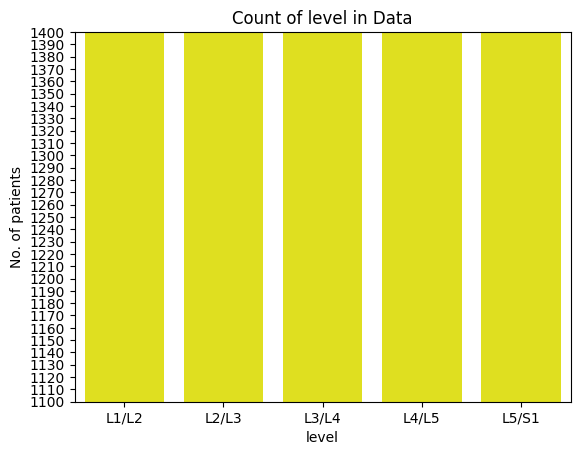

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=df1, x='level', color='yellow')

# Adding plot title and labels
plt.title('Count of level in Data')
plt.xlabel('level')
plt.ylabel('No. of patients')

# Setting the y-axis limits to focus between 1100 to 1400
plt.ylim(1100, 1400)

# Customizing the y-axis ticks for more sensitivity in the specified range
plt.yticks(range(1100, 1401, 10))  # Adjust the step for ticks as needed for better granularity

# Display the plot
plt.show()

In [58]:
df_Left_Subarticular_Stenosis=dfle[dfle['condition']==0]
df_Left_Subarticular_Stenosis

,Unnamed: 0,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,0,4003253,2448190387,3,0,0,179.126448,161.235521,1,0
1,1,4003253,2448190387,11,0,1,180.979730,158.764479,1,0
2,2,4003253,2448190387,19,0,2,176.037645,157.528958,1,0
3,3,4003253,2448190387,28,0,3,172.948842,156.911197,0,0
4,4,4003253,2448190387,35,0,4,179.744208,161.853282,1,0
...,...,...,...,...,...,...,...,...,...,...
9603,9603,4290709089,3390218084,3,0,0,352.531699,358.140321,1,0
9604,9604,4290709089,3390218084,5,0,1,349.285714,366.796281,1,0
9605,9605,4290709089,3390218084,10,0,2,350.367709,360.845309,1,0
9606,9606,4290709089,3390218084,15,0,3,348.203719,341.369400,1,0


In [59]:
!pip install missingno

In [60]:
from glob import glob
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

competition_dataset_directory = Path("D:\\dataset\\lumbarspine")

In [62]:
train_images = glob(str(competition_dataset_directory / 'train_images' / '*' / '*' / '*.dcm'))
df_train = pd.read_csv(competition_dataset_directory / 'train.csv')
df_train_series_descriptions = pd.read_csv(competition_dataset_directory / 'train_series_descriptions.csv')
df_train_label_coordinates = pd.read_csv(competition_dataset_directory / 'train_label_coordinates.csv')

print(f'Training Images Count {len(train_images)}')
print(f'Training Set Shape: {df_train.shape}')
print(f'Train Series Descriptions Shape: {df_train_series_descriptions.shape}')
print(f'Train Label Coordinates Shape: {df_train_label_coordinates.shape}')

Training Images Count 147218
Training Set Shape: (1975, 26)
Train Series Descriptions Shape: (6294, 3)
Train Label Coordinates Shape: (48692, 7)


In [63]:
def visualize_condition_counts(df, title, path=None):
    
    """
    Visualize condition counts on training set
    
    Parameters
    ----------
    df: pandas.DataFrame
        Counts and percentages of conditions
        
    title: str
        Title of the plot
        
    path: str, pathlib.Path or None
        Path of the output file (if path is None, plot is displayed with selected backend)
    """
    
    fig, ax = plt.subplots(figsize=(24, 16))

    ax.barh(
        y=np.arange(df.shape[0] // 3) - 0.2,
        width=df['count'].values[0::3],
        height=0.2,
        align='center',
        label='Normal/Mild'
    )
    ax.barh(
        y=np.arange(df.shape[0] // 3),
        width=df['count'].values[1::3],
        height=0.2,
        align='center',
        label='Moderate'
    )
    ax.barh(
        y=np.arange(df.shape[0] // 3) + 0.2,
        width=df['count'].values[2::3],
        height=0.2,
        align='center',
        label='Severe'
    )
    ax.set_yticks(np.arange(df.shape[0] // 3))
    ax.set_yticklabels([
        f'{level}\nNormal Count: {normal_count} ({normal_percentage:.2f}%)\nModerate Count: {moderate_count} ({moderate_percentage:.2f}%)\nSevere Count: {severe_count} ({severe_percentage:.2f}%)' for level, normal_count, normal_percentage, moderate_count, moderate_percentage, severe_count, severe_percentage, in zip(
            df['level'].values[0::3],
            df['count'].values[0::3],
            df['percentage'].values[0::3],
            df['count'].values[1::3],
            df['percentage'].values[1::3],
            df['count'].values[2::3],
            df['percentage'].values[2::3],
        )
    ])
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelsize=17.5, pad=10)
    ax.tick_params(axis='y', labelsize=17.5, pad=10)
    ax.set_title(title, size=20, pad=15)
    ax.legend(loc='best', prop={'size': 18})
    plt.gca().invert_yaxis()

    plt.show()

    if path is None:
        plt.show()
    else:
        plt.savefig(path)
        plt.close(fig)
    

In [64]:
subarticular_stenosis_columns = [column for column in df_train.columns if 'subarticular_stenosis' in column]
df_train_subarticular_stenosis = []

for column in subarticular_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'subarticular_stenosis'})
    df_train_subarticular_stenosis.append(df)
    
df_train_subarticular_stenosis = pd.concat(df_train_subarticular_stenosis, axis=0).reset_index(drop=True)

df_train_subarticular_stenosis_counts = df_train_subarticular_stenosis.groupby('level').value_counts().reset_index()
df_train_subarticular_stenosis_counts['severity'] = df_train_subarticular_stenosis_counts['subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_subarticular_stenosis_counts = df_train_subarticular_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_subarticular_stenosis_counts['percentage'] = df_train_subarticular_stenosis_counts['count'] / df_train_subarticular_stenosis_counts.groupby('level')['count'].transform('sum') * 100

left_subarticular_stenosis_columns = [column for column in df_train.columns if column.startswith('left_subarticular_stenosis')]
df_train_left_subarticular_stenosis = []

for column in left_subarticular_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_subarticular_stenosis'})
    df_train_left_subarticular_stenosis.append(df)
    
df_train_left_subarticular_stenosis = pd.concat(df_train_left_subarticular_stenosis, axis=0).reset_index(drop=True)

df_train_left_subarticular_stenosis_counts = df_train_left_subarticular_stenosis.groupby('level').value_counts().reset_index()
df_train_left_subarticular_stenosis_counts['severity'] = df_train_left_subarticular_stenosis_counts['left_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_subarticular_stenosis_counts = df_train_left_subarticular_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_left_subarticular_stenosis_counts['percentage'] = df_train_left_subarticular_stenosis_counts['count'] / df_train_left_subarticular_stenosis_counts.groupby('level')['count'].transform('sum') * 100

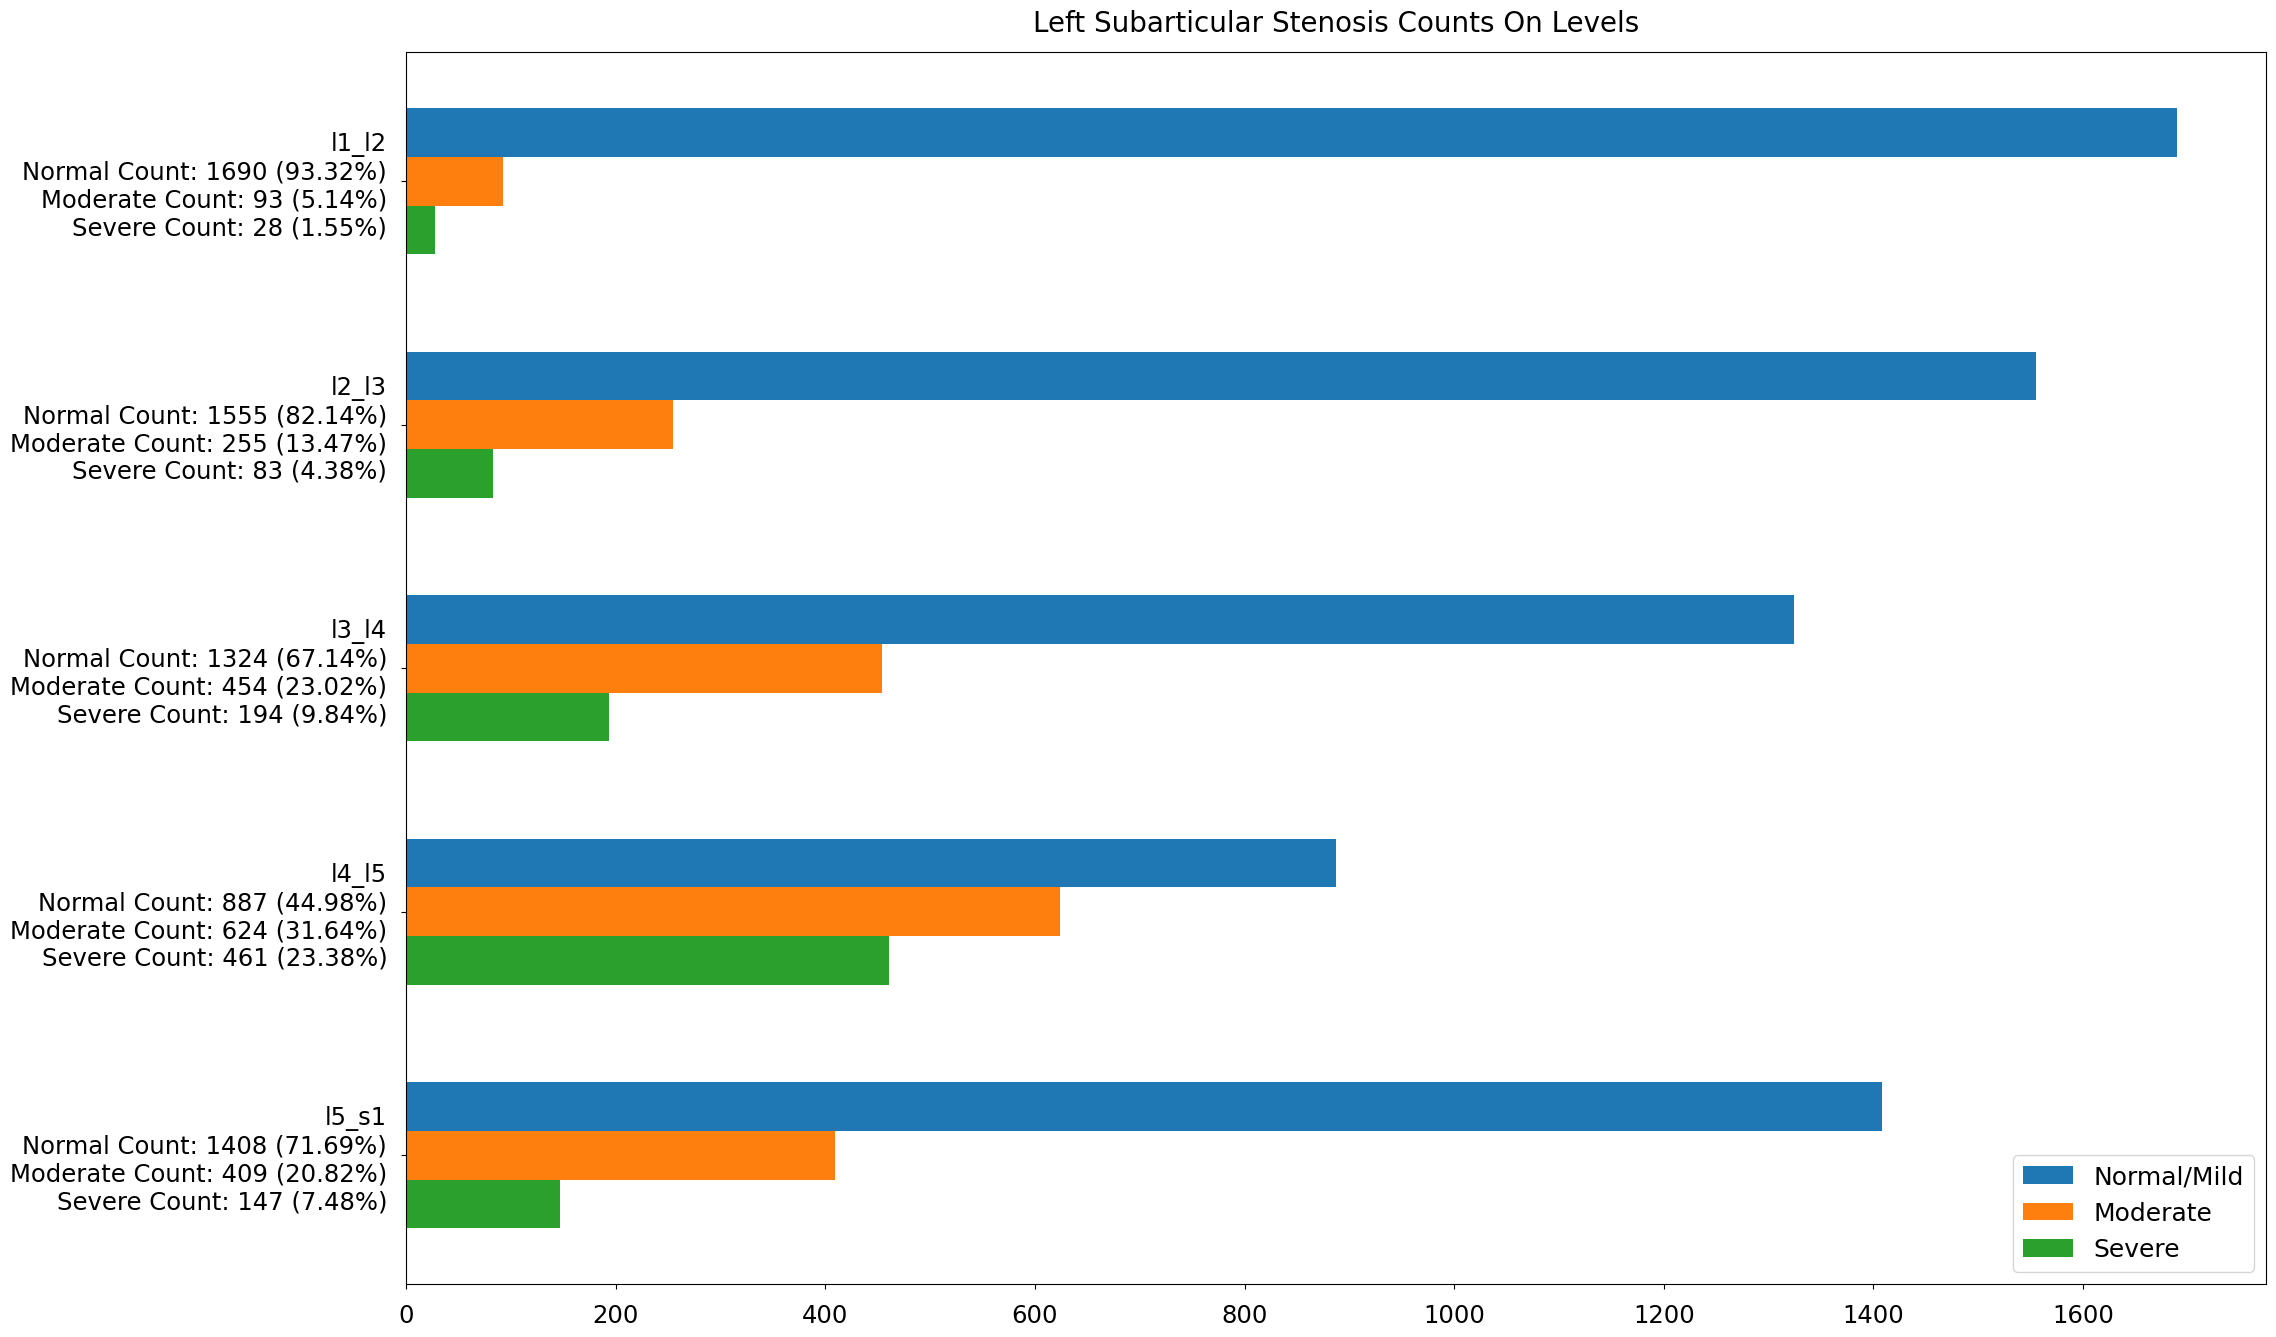

In [65]:
visualize_condition_counts(
    df=df_train_left_subarticular_stenosis_counts,
    title='Left Subarticular Stenosis Counts On Levels'
)


In [66]:
subarticular_stenosis_columns = [column for column in df_train.columns if 'subarticular_stenosis' in column]
df_train_left_right_subarticular_stenosis = []

for column in subarticular_stenosis_columns[:5]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_subarticular_stenosis'})
    df_train_left_right_subarticular_stenosis.append(df)

for column in subarticular_stenosis_columns[5:]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'right_subarticular_stenosis'})
    df_train_left_right_subarticular_stenosis.append(df)
    
df_train_left_right_subarticular_stenosis = pd.concat((
    pd.concat(df_train_left_right_subarticular_stenosis[:5], axis=0).reset_index(drop=True).iloc[:, :1],
    pd.concat(df_train_left_right_subarticular_stenosis[5:], axis=0).reset_index(drop=True)
), axis=1, ignore_index=False)

df_train_left_right_subarticular_stenosis['left_severity'] = df_train_left_right_subarticular_stenosis['left_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_subarticular_stenosis['right_severity'] = df_train_left_right_subarticular_stenosis['right_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_subarticular_stenosis['level_'] = df_train_left_right_subarticular_stenosis['level'].map({
    'l1_l2': 0,
    'l2_l3': 1,
    'l3_l4': 2,
    'l4_l5': 3,
    'l5_s1': 4
})

In [67]:
df_subarticular_stenosis_correlations = df_train_left_right_subarticular_stenosis[['level_', 'left_severity', 'right_severity']].corr()
display(df_subarticular_stenosis_correlations)

,level_,left_severity,right_severity
level_,1.000000,0.236914,0.245518
left_severity,0.236914,1.000000,0.581930
right_severity,0.245518,0.581930,1.000000


In [68]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model, activations
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelBinarizer
import pydicom
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


from sklearn.model_selection import StratifiedGroupKFold

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import csv

In [69]:
IMAGE_SIZE = (128, 128)

In [70]:
file_path = 'filtered_master_data.csv'
data = pd.read_csv(file_path)
data = data[data["condition"] == "Left Subarticular Stenosis"]
data = data.dropna()

In [71]:
data.shape

(9603, 10)

In [72]:
data

,Unnamed: 0,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,0,4003253,2448190387,3,Left Subarticular Stenosis,L1/L2,179.126448,161.235521,Normal/Mild,Axial T2
1,1,4003253,2448190387,11,Left Subarticular Stenosis,L2/L3,180.979730,158.764479,Normal/Mild,Axial T2
2,2,4003253,2448190387,19,Left Subarticular Stenosis,L3/L4,176.037645,157.528958,Normal/Mild,Axial T2
3,3,4003253,2448190387,28,Left Subarticular Stenosis,L4/L5,172.948842,156.911197,Moderate,Axial T2
4,4,4003253,2448190387,35,Left Subarticular Stenosis,L5/S1,179.744208,161.853282,Normal/Mild,Axial T2
...,...,...,...,...,...,...,...,...,...,...
9603,9603,4290709089,3390218084,3,Left Subarticular Stenosis,L1/L2,352.531699,358.140321,Normal/Mild,Axial T2
9604,9604,4290709089,3390218084,5,Left Subarticular Stenosis,L2/L3,349.285714,366.796281,Normal/Mild,Axial T2
9605,9605,4290709089,3390218084,10,Left Subarticular Stenosis,L3/L4,350.367709,360.845309,Normal/Mild,Axial T2
9606,9606,4290709089,3390218084,15,Left Subarticular Stenosis,L4/L5,348.203719,341.369400,Normal/Mild,Axial T2


In [73]:
def split_data(df):
    sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

    for train_idx, test_idx in sgkf.split(df, df['severity'], groups=df['study_id']):
        # We only need the first split, which is 80/20
        return (df.iloc[train_idx], df.iloc[test_idx])

In [74]:
def load_and_preprocess_dicom(image_path):
    dicom = pydicom.dcmread(image_path)
    image = dicom.pixel_array
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = tf.image.resize(image, IMAGE_SIZE)
    # image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = image / 255.0  # Normalize to [0, 1]
    return image


In [75]:
def preprocess_input(data):
    # Initialize lists to store images, coordinates, and severities
    images = []
    coordinates = []
    severities = []
    img_path = []

    # Process each row in the CSV file
    for index, row in data.iterrows():
        # Construct the full image path
        image_path = os.path.join(f"D:\\dataset\\lumbarspine\\train_images\\{row['study_id']}", f"{row['series_id']}", f"{row['instance_number']}.dcm")
        
        # Check if the image file exists
        if os.path.exists(image_path):
            print(f"File found: {image_path}")
            # Load and preprocess the image
            image = load_and_preprocess_dicom(image_path)
            images.append(image)
            img_path.append([image_path, image.shape])

            # Collect coordinates
            coordinate = [row['x'], row['y']]
            coordinates.append(coordinate)

            # Collect severities
            severities.append(row['severity'])
        else:
            print(f"File not found: {image_path}")
            img_path.append([image_path, "not found"])

    # Validate collected data
    if not severities:
        raise ValueError("No valid data found. Ensure your dataset and paths are correct.")

    # Convert lists to numpy arrays
    images = np.array(images)
    coordinates = np.array(coordinates)

    # Handle missing coordinates by filling with a placeholder value (e.g., (0, 0))
    coordinates = np.nan_to_num(coordinates, nan=0.0)

    # One-hot encode severities
    severity_binarizer = LabelBinarizer()
    severities = severity_binarizer.fit_transform(severities)
    
    # Log for debugging
    print(f"Collected {len(images)} images, {len(coordinates)} coordinates, and {len(severities)} severities.")
    
    return (images, coordinates, severities)


In [76]:
print(train.head())

   study_id spinal_canal_stenosis_l1_l2 spinal_canal_stenosis_l2_l3 spinal_canal_stenosis_l3_l4 spinal_canal_stenosis_l4_l5 spinal_canal_stenosis_l5_s1 left_neural_foraminal_narrowing_l1_l2 left_neural_foraminal_narrowing_l2_l3 left_neural_foraminal_narrowing_l3_l4 left_neural_foraminal_narrowing_l4_l5 left_neural_foraminal_narrowing_l5_s1 right_neural_foraminal_narrowing_l1_l2 right_neural_foraminal_narrowing_l2_l3 right_neural_foraminal_narrowing_l3_l4 right_neural_foraminal_narrowing_l4_l5 right_neural_foraminal_narrowing_l5_s1 left_subarticular_stenosis_l1_l2 left_subarticular_stenosis_l2_l3 left_subarticular_stenosis_l3_l4 left_subarticular_stenosis_l4_l5 left_subarticular_stenosis_l5_s1 right_subarticular_stenosis_l1_l2 right_subarticular_stenosis_l2_l3 right_subarticular_stenosis_l3_l4 right_subarticular_stenosis_l4_l5 right_subarticular_stenosis_l5_s1
0   4003253                 Normal/Mild                 Normal/Mild                 Normal/Mild                 Normal/Mild     

In [77]:
severities = data["severity"].values

In [78]:
print(severities)

['Normal/Mild' 'Normal/Mild' 'Normal/Mild' ... 'Normal/Mild' 'Normal/Mild'
 'Normal/Mild']


In [79]:
(train,val) = split_data(data)
(train_images, train_coordinates, train_severities) = preprocess_input(train)
(val_images, val_coordinates, val_severities) = preprocess_input(val)


# Print shapes to verify
print("Training set shapes:", train_images.shape, train_coordinates.shape, train_severities.shape)
print("Validation set shapes:", val_images.shape, val_coordinates.shape, val_severities.shape)

File found: D:\dataset\lumbarspine\train_images\4003253\2448190387\3.dcm
File found: D:\dataset\lumbarspine\train_images\4003253\2448190387\11.dcm
File found: D:\dataset\lumbarspine\train_images\4003253\2448190387\19.dcm
File found: D:\dataset\lumbarspine\train_images\4003253\2448190387\28.dcm
File found: D:\dataset\lumbarspine\train_images\4003253\2448190387\35.dcm
File found: D:\dataset\lumbarspine\train_images\4646740\3201256954\16.dcm
File found: D:\dataset\lumbarspine\train_images\4646740\3201256954\22.dcm
File found: D:\dataset\lumbarspine\train_images\4646740\3201256954\29.dcm
File found: D:\dataset\lumbarspine\train_images\4646740\3201256954\34.dcm
File found: D:\dataset\lumbarspine\train_images\4646740\3201256954\40.dcm
File found: D:\dataset\lumbarspine\train_images\8785691\2406919186\3.dcm
File found: D:\dataset\lumbarspine\train_images\8785691\2406919186\8.dcm
File found: D:\dataset\lumbarspine\train_images\8785691\2406919186\12.dcm
File found: D:\dataset\lumbarspine\train_

In [80]:
def get_best_model(checkpoint_dir):
# Get all checkpoint files
    checkpoint_files = os.listdir(checkpoint_dir)

    # Extract the validation loss from the filenames and find the one with the lowest validation loss
    best_model_path = None
    best_val_loss = float('inf')
    for file in checkpoint_files:
        if file.endswith('.h5'):
            parts = file.split('-')
            val_loss = float(parts[-1].replace('.h5', ''))
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_path = os.path.join(checkpoint_dir, file)

    print(f"Loading [{best_model_path}]")

    return models.load_model(best_model_path)

In [81]:
def callback (checkpoint_dir):
    # Set up the checkpoint callback
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    checkpoint_callback = ModelCheckpoint(filepath=checkpoint_dir + '/model-{epoch:02d}-{val_loss:.4f}.h5',
                            save_weights_only=False,
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1)

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

    return [checkpoint_callback,early_stopping,reduce_lr]

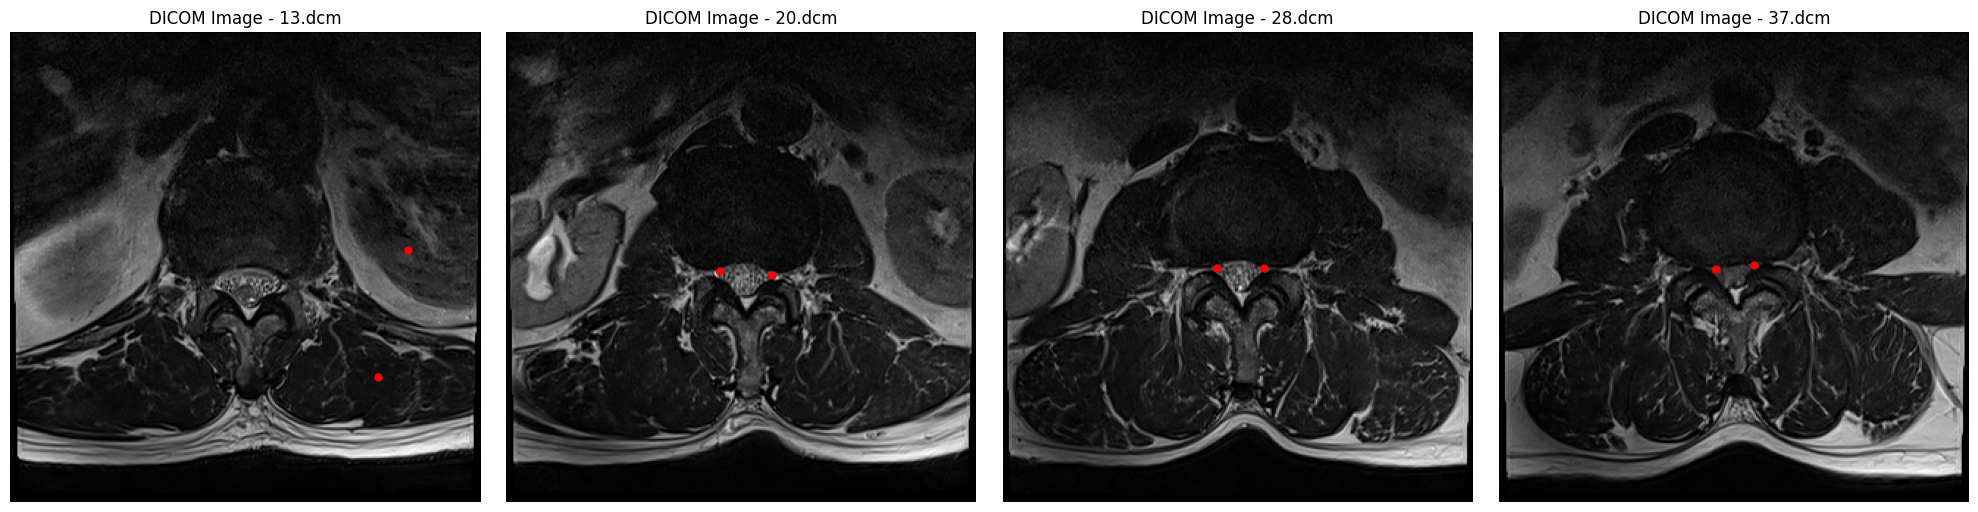

In [98]:
folder_path = 'D:\\dataset\\lumbarspine\\train_images\\100206310\\1012284084'
dicom_files = [f for f in os.listdir(folder_path) if f.endswith('.dcm')]
label_coordinates_df = pd.read_csv("D:\\dataset\\lumbarspine\\train_label_coordinates.csv")

study_id = folder_path.split('\\')[-2]
study_label_coordinates = label_coordinates_df[label_coordinates_df['study_id'] == int(study_id)]
filtered_dicom_files = []
filtered_label_coordinates = []

for dicom_file in dicom_files:
    instance_number = int(dicom_file.split('.')[0])
    corresponding_coordinates = study_label_coordinates[study_label_coordinates['instance_number'] == instance_number]
    if not corresponding_coordinates.empty:
        filtered_dicom_files.append(dicom_file)
        filtered_label_coordinates.append(corresponding_coordinates)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
second_row_index = 1
second_row_images = filtered_dicom_files[second_row_index : second_row_index + 4]
second_row_coordinates = filtered_label_coordinates[second_row_index : second_row_index + 4]

for i, (dicom_file, label_coordinates) in enumerate(zip(second_row_images, second_row_coordinates)):
    dicom_file_path = os.path.join(folder_path, dicom_file)
    dicom_data = pydicom.dcmread(dicom_file_path)
    image = dicom_data.pixel_array   
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f'DICOM Image - {dicom_file}')
    axs[i].axis('off')   
    for _, row in label_coordinates.iterrows():
        axs[i].plot(row['x'], row['y'], 'ro', markersize=5) 
        
plt.tight_layout()
plt.show()

In [343]:
(xsize, ysize) = IMAGE_SIZE
def create_model():
    (xsize,ysize) = IMAGE_SIZE

    # CNN for image processing
    image_cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='sigmoid', padding='same', input_shape=(xsize, ysize, 1), name='conv2d_image_1'),
        BatchNormalization(name='batch_norm_image_1'),
        MaxPooling2D((2, 2), name='max_pool_image_1'),
        Conv2D(64, (3, 3), activation='sigmoid', padding='same', name='conv2d_image_2'),
        BatchNormalization(name='batch_norm_image_2'),
        MaxPooling2D((2, 2), name='max_pool_image_2'),
        Conv2D(128, (3, 3), activation='sigmoid', padding='same', name='conv2d_image_3'),
        BatchNormalization(name='batch_norm_image_3'),
        MaxPooling2D((2, 2), name='max_pool_image_3'),
        Flatten(name='flatten_image')
    ])

    # MLP for coordinates
    coordinates_mlp_model = Sequential([
        Dense(64, activation='sigmoid', input_shape=(2,), name='dense_coords_1'),
        Dense(32, activation='sigmoid', name='dense_coords_2')
    ])

    # Combining both models using Functional API
    image_input = Input(shape=(xsize, ysize, 1), name='image_input')
    coords_input = Input(shape=(2,), name='coords_input')

    cnn_output = image_cnn_model(image_input)
    mlp_output = coordinates_mlp_model(coords_input)

    combined = Concatenate(name='concat_image_coords')([cnn_output, mlp_output])
    x = Dense(128, activation='sigmoid', name='dense_combined_1')(combined)
    x = Dense(64, activation='sigmoid', name='dense_combined_2')(x)

    # Output layer (adjust 'num_classes' for your classification task)
    num_classes = 3  # Example number of classes
    output = Dense(num_classes, activation='softmax', name='output_layer')(x)

    # Create and compile the model
    model = Model(inputs=[image_input, coords_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [344]:
# Summary of the model
model = create_model()
model.summary()

C:\Users\ASUS\anaconda3\envs\likhith\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ASUS\anaconda3\envs\likhith\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ coords_input (InputLayer)     │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_80 (Sequential)    │ (None, 32768)             │          93,568 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_81 (Sequential)    │ (None, 32)                │           2,272 │ coords_input[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_image_coords           │ (None, 32800)             │               0 │ sequential_80[0][0],       │
│ (Concatenate)                 │                           │                 │ sequential_81[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_combined_1 (Dense)      │ (None, 128)               │       4,198,528 │ concat_image_coords[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_combined_2 (Dense)      │ (None, 64)                │           8,256 │ dense_combined_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_layer (Dense)          │ (None, 3)                 │             195 │ dense_combined_2[0][0]     │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,302,819 (16.41 MB)

 Trainable params: 4,302,371 (16.41 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.fit([train_images, train_coordinates], train_severities,
        epochs=1000, batch_size=32,
        validation_data=([val_images, val_coordinates], val_severities))

Epoch 1/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 130s 513ms/step - accuracy: 0.6971 - loss: 0.7985 - val_accuracy: 0.7107 - val_loss: 0.7830
Epoch 2/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 122s 506ms/step - accuracy: 0.7147 - loss: 0.7579 - val_accuracy: 0.7107 - val_loss: 0.7589
Epoch 3/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 124s 512ms/step - accuracy: 0.7141 - loss: 0.7384 - val_accuracy: 0.7038 - val_loss: 0.7404
Epoch 4/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 122s 508ms/step - accuracy: 0.7252 - loss: 0.6920 - val_accuracy: 0.6991 - val_loss: 0.7694
Epoch 5/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 125s 517ms/step - accuracy: 0.7189 - loss: 0.6935 - val_accuracy: 0.7091 - val_loss: 0.7109
Epoch 6/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 122s 504ms/step - accuracy: 0.7289 - loss: 0.6684 - val_accuracy: 0.7117 - val_loss: 0.7109
Epoch 7/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 120s 499ms/step - accuracy: 0.7258 - loss: 0.6632 - val_accuracy: 0.7107 - val_loss: 0.6996
Epoch 8/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 125s 520ms/step - ac

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.utils import plot_model

def create_model(IMAGE_SIZE=(216, 216), num_classes=3):
    (xsize, ysize) = IMAGE_SIZE

    # CNN for image processing
    image_input = Input(shape=(xsize, ysize, 1), name='image_input')
    x = Conv2D(32, (3, 3), activation='sigmoid', padding='same', name='conv2d_image_1')(image_input)
    x = BatchNormalization(name='batch_norm_image_1')(x)
    x = MaxPooling2D((2, 2), name='max_pool_image_1')(x)
    x = Conv2D(64, (3, 3), activation='sigmoid', padding='same', name='conv2d_image_2')(x)
    x = BatchNormalization(name='batch_norm_image_2')(x)
    x = MaxPooling2D((2, 2), name='max_pool_image_2')(x)
    x = Conv2D(128, (3, 3), activation='sigmoid', padding='same', name='conv2d_image_3')(x)
    x = BatchNormalization(name='batch_norm_image_3')(x)
    x = MaxPooling2D((2, 2), name='max_pool_image_3')(x)
    cnn_output = Flatten(name='flatten_image')(x)

    # MLP for coordinates
    coords_input = Input(shape=(2,), name='coords_input')
    y = Dense(64, activation='sigmoid', name='dense_coords_1')(coords_input)
    mlp_output = Dense(32, activation='sigmoid', name='dense_coords_2')(y)

    # Combining both models using Functional API
    combined = Concatenate(name='concat_image_coords')([cnn_output, mlp_output])
    x = Dense(128, activation='sigmoid', name='dense_combined_1')(combined)
    x = Dense(64, activation='sigmoid', name='dense_combined_2')(x)

    # Output layer
    output = Dense(num_classes, activation='softmax', name='output_layer')(x)

    # Create and compile the model
    model = Model(inputs=[image_input, coords_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
model = create_model()

# Plot and save the model architecture
plot_model(model, to_file='model_architecture_expanded.png', show_shapes=True, show_layer_names=True)

# Optionally display the plot in the notebook (if using Jupyter)
from IPython.display import Image
Image(filename='model_architecture_expanded.png')   

In [ ]:
model

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
import pydicom
import numpy as np
import cv2

# Load the DICOM file
image_path = 'D:\\dataset\\lumbarspine\\train_images\\4279958262\\1197867861\\40.dcm'
dcm = pydicom.dcmread(image_path)

# Extract the pixel array
image_array = dcm.pixel_array

# Normalize the pixel values to [0, 1]
image_array = image_array.astype(np.float32) / np.max(image_array)

# Resize the image to match the input size of the model
image_resized = cv2.resize(image_array, (216, 216))

# Expand dimensions to add batch size
image_resized = np.expand_dims(image_resized, axis=-1)  # Add channel dimension (if needed)
image_resized = np.expand_dims(image_resized, axis=0) 

In [91]:
model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 216, 216, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_image_1 (Conv2D)       │ (None, 216, 216, 32)      │             320 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_norm_image_1            │ (None, 216, 216, 32)      │             128 │ conv2d_image_1[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pool_image_1              │ (None, 108, 108, 32)      │               0 │ batch_norm_image_1[0][0]   │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_image_2 (Conv2D)       │ (None, 108, 108, 64)      │          18,496 │ max_pool_image_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_norm_image_2            │ (None, 108, 108, 64)      │             256 │ conv2d_image_2[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pool_image_2              │ (None, 54, 54, 64)        │               0 │ batch_norm_image_2[0][0]   │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_image_3 (Conv2D)       │ (None, 54, 54, 128)       │          73,856 │ max_pool_image_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_norm_image_3            │ (None, 54, 54, 128)       │             512 │ conv2d_image_3[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ coords_input (InputLayer)     │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pool_image_3              │ (None, 27, 27, 128)       │               0 │ batch_norm_image_3[0][0]   │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_coords_1 (Dense)        │ (None, 64)                │             192 │ coords_input[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_image (Flatten)       │ (None, 93312)             │               0 │ max_pool_image_3[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_coords_2 (Dense)        │ (None, 32)                │           2,080 │ dense_coords_1[0][0]       │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 12,052,451 (45.98 MB)

 Trainable params: 12,052,003 (45.97 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
x_min, x_max = 0, 400  # Range for x values
y_min, y_max = 0, 300  # Range for y values

# Create a random array with a similar structure
cord_array = np.array([[np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)]])

In [13]:
predictions = model.predict([image_resized,cord_array])

# Example output: [[0.2, 0.7, 0.1]] (probabilities for each class)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.5159424  0.33129516 0.15276241]]


In [2]:
import pickle

In [3]:
with open('lumbar_model1.pkl', 'rb') as file:
    model = pickle.load(file)

C:\Users\ASUS\anaconda3\envs\likhith\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 46 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [16]:
predictions = model.predict([image_resized,cord_array])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.5157381  0.33173376 0.15252808]]


In [ ]:
import cv2

In [15]:
image_path = "D:\\dataset\\lumbarspine\\train_images\\60612428\\2349970136\\9.dcm"
image = pydicom.dcmread(image_path).pixel_array
image_resized = cv2.resize(image, (216, 216))  # Resize to match input shape
image_resized = np.expand_dims(image_resized, axis=-1)  # Add channel dimension
image_resized = np.expand_dims(image_resized, axis=0)

In [97]:
import pickle

In [98]:
with open("lumbar_model1.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
# from tensorflow.keras.models import save_model

# # Save the model to a specified path
# model.save('rsna_model.h5')  # Save in HDF5 format (e.g., "model.h5")



In [ ]:
for i, inp in enumerate(model.inputs):
    print(f"Input {i+1}: {inp.name}, Shape: {inp.shape}")

In [2]:
import pickle

In [3]:
with open('lumbar_model1.pkl', 'rb') as file:
    model = pickle.load(file)

C:\Users\ASUS\anaconda3\envs\likhith\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 46 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


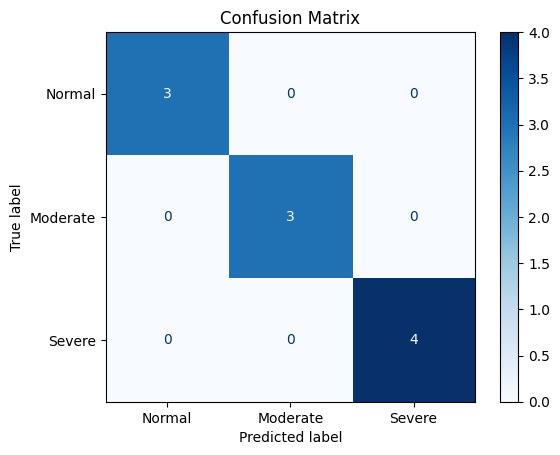

Normalized Confusion Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example ground truth labels (10 samples)
true_labels = [
    'Normal', 'Moderate', 'Severe', 'Moderate', 'Severe', 
    'Normal', 'Severe', 'Moderate', 'Normal', 'Severe'
]

# Simulated probabilities for each example (10 samples, 3 classes)
prediction_probabilities = np.array([
    [0.7, 0.2, 0.1],  # Predicted 'Normal'
    [0.1, 0.6, 0.3],  # Predicted 'Moderate'
    [0.05, 0.1, 0.85], # Predicted 'Severe'
    [0.2, 0.5, 0.3],  # Predicted 'Moderate'
    [0.1, 0.2, 0.7],  # Predicted 'Severe'
    [0.8, 0.15, 0.05], # Predicted 'Normal'
    [0.3, 0.2, 0.5],  # Predicted 'Severe'
    [0.1, 0.7, 0.2],  # Predicted 'Moderate'
    [0.6, 0.25, 0.15], # Predicted 'Normal'
    [0.2, 0.2, 0.6],  # Predicted 'Severe'
])

# Class names corresponding to probabilities
class_labels = ['Normal', 'Moderate', 'Severe']

# Map probabilities to predicted classes
predicted_labels = [class_labels[np.argmax(prob)] for prob in prediction_probabilities]

# Ensure that lengths match
if len(true_labels) != len(predicted_labels):
    raise ValueError("The number of true labels and predicted labels must match!")

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# (Optional) Normalize confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
print("Normalized Confusion Matrix:")
print(normalized_cm)
